    In this research, I examined how do the mechanisms of 'Food', 'Ambience', and 'Service' might lead to restaurant closing.  My data is from Yelp. After I did some filtering, it contains 11,484 reviews of 500 closed restaurants and 21,285 reviews of 500 open restaurants. Some of the computational method that I used include: Tokenizing, Normalizing POS Tagging, Word Cloud, Word2Vec, PCA, etc.

In [27]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [28]:
#Loading in the dataset
close_restaurant_reviewDF = pandas.read_csv('closerestaurants_review.csv', sep='\t')
close_restaurant_reviewDF = close_restaurant_reviewDF.dropna(axis=0, how='any')
close_restaurant_reviewDF[:5]

,business_id,text
0,--g-a85VwrdZJNf0R95GcQ,These guys are great. \n\nExtremely friendly a...
1,--g-a85VwrdZJNf0R95GcQ,"What a wonderful surprise, this restaurant was..."
2,--g-a85VwrdZJNf0R95GcQ,Ordered takeout from the place and the food wa...
3,--g-a85VwrdZJNf0R95GcQ,fantastic to have a true Mediterranean restaur...
4,--g-a85VwrdZJNf0R95GcQ,All the food is very fresh and incredibly deli...


In [29]:
close_restaurant_reviewDF.shape

(11484, 2)

In [30]:
#Loading in the dataset
open_restaurant_reviewDF = pandas.read_csv('openrestaurants_review.csv', sep='\t')
open_restaurant_reviewDF = open_restaurant_reviewDF.dropna(axis=0, how='any')
open_restaurant_reviewDF.shape

(21285, 2)

In [31]:
#Do some tokenizing and normalizing
close_restaurant_reviewDF['tokenized_text'] = close_restaurant_reviewDF['text'].apply(lambda x: nltk.word_tokenize(x))
close_restaurant_reviewDF['normalized_text'] = close_restaurant_reviewDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [32]:
open_restaurant_reviewDF['tokenized_text'] = open_restaurant_reviewDF['text'].apply(lambda x: nltk.word_tokenize(x))
open_restaurant_reviewDF['normalized_text'] = open_restaurant_reviewDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [33]:
close_restaurant_reviewDF[:5]

,business_id,text,tokenized_text,normalized_text
0,--g-a85VwrdZJNf0R95GcQ,These guys are great. \n\nExtremely friendly a...,"[These, guys, are, great, ., \n\nExtremely, fr...","[guy, great, friend, nice, servic, food, perfe..."
1,--g-a85VwrdZJNf0R95GcQ,"What a wonderful surprise, this restaurant was...","[What, a, wonderful, surprise, ,, this, restau...","[wonder, surpris, restaur, famili, restaur, ni..."
2,--g-a85VwrdZJNf0R95GcQ,Ordered takeout from the place and the food wa...,"[Ordered, takeout, from, the, place, and, the,...","[order, takeout, place, food, great, got, gyro..."
3,--g-a85VwrdZJNf0R95GcQ,fantastic to have a true Mediterranean restaur...,"[fantastic, to, have, a, true, Mediterranean, ...","[fantast, true, mediterranean, restaur, everyt..."
4,--g-a85VwrdZJNf0R95GcQ,All the food is very fresh and incredibly deli...,"[All, the, food, is, very, fresh, and, incredi...","[food, veri, fresh, incred, delici, falafel, p..."


In [34]:
from nltk import tokenize

In [35]:
close_restaurant_review_sentences = close_restaurant_reviewDF['text'].apply(lambda x: tokenize.sent_tokenize(x))
type(close_restaurant_review_sentences)

pandas.core.series.Series

In [36]:
open_restaurant_review_sentences = open_restaurant_reviewDF['text'].apply(lambda x: tokenize.sent_tokenize(x))
open_restaurant_review_sentences

0        [Good quality Chinese food., Decor is nice for...
1        [If you're a true Chinese food enthusiast, you...
2        [Six dollars combo include free soup and one m...
3        [The BBQ meats here are the only items I find ...
4        [If you want a quick fix for a scrumptious cha...
5        [The bbq pork is very juicy and I only come he...
6        [My family has been taking me to this restaura...
7        [This restaurant is famous for their BBQ dishe...
8        [Johns Chinese BBQ ruined Char Siu Pork for me...
9        [The incredibly rude woman behind the cashier ...
10       [Best tasting BBQ pork in the region!, I start...
11       [Wow, what a jerk!, I don't write terrible rev...
12       [In the ultra competitive Chinese restaurant i...
13       [Went there yesterday at around 5., Me and a f...
14       [Chinese name of this place, Canto pronounciat...
15       [This place is a favourite lunch spot for my f...
16       [Roasted pork is one of my favorite things... .

In [37]:
#Some more POS Tagging
close_restaurant_reviewDF['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in close_restaurant_reviewDF['normalized_text']]
reviewcfdist_WordtoPOS_close = nltk.ConditionalFreqDist(close_restaurant_reviewDF['normalized_tokens_POS'].sum())
reviewcfdist_POStoWord_close= nltk.ConditionalFreqDist((p, w) for w, p in close_restaurant_reviewDF['normalized_tokens_POS'].sum())


In [38]:
reviewcfdist_POStoWord_close['JJS']

FreqDist({'attest': 2,
          'best': 1692,
          'biggest': 67,
          'blandest': 3,
          'breakfast': 1,
          'brest': 3,
          'briskest': 1,
          'busiest': 3,
          'carbfest': 1,
          'cheapest': 15,
          'chest': 1,
          'cleanest': 1,
          'closest': 26,
          'coldest': 1,
          'congest': 3,
          'coolest': 9,
          'coziest': 1,
          'cutest': 3,
          'dearest': 1,
          'detest': 1,
          'digest': 5,
          'dirtiest': 1,
          'dishonest': 3,
          'disinterest': 4,
          'domest': 8,
          'driest': 1,
          'dumbest': 2,
          'earliest': 1,
          'earnest': 39,
          'easiest': 6,
          'eldest': 1,
          'est': 28,
          'everest': 19,
          'fairest': 1,
          'fanciest': 3,
          'farthest': 1,
          'fastest': 3,
          'feistiest': 1,
          'fest': 15,
          'finest': 14,
          'fittest': 1,
        

In [39]:
#Most common nouncs in reviews from close restaurants
reviewcfdist_POStoWord_close['NN'].most_common(5)

[('place', 8675),
 ('food', 7197),
 ('time', 4989),
 ('order', 4728),
 ('veri', 3405)]

In [40]:
#Most common superlative adjectives in close restaurants
reviewcfdist_POStoWord_close['JJS'].most_common(5)

[('best', 1692),
 ('least', 526),
 ('worst', 221),
 ('honest', 189),
 ('guest', 137)]

Initially I thought there would be many "bad" words in the reviews from close restaurants. Out of my expectation, however, the top super adjective word shown, is "best". 

In [41]:
reviewcpdist_POStoWord_close = nltk.ConditionalProbDist(reviewcfdist_POStoWord_close, nltk.ELEProbDist)

#print the most common adjectives
print(reviewcpdist_POStoWord_close['JJS'].max())

#And its probability
print(reviewcpdist_POStoWord_close['JJS'].prob(reviewcpdist_POStoWord_close['JJS'].max()))

best
0.4528428093645485


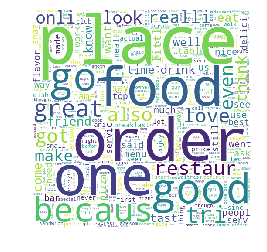

In [42]:
#WordCloud of words in reviews from close restaurants
wc_review = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(close_restaurant_reviewDF['normalized_text'].sum()))
plt.imshow(wc_review)
plt.axis("off")
plt.savefig("close_restaurant_review_word_cloud.pdf", format = 'pdf')

In [43]:
open_restaurant_reviewDF['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in open_restaurant_reviewDF['normalized_text']]
reviewcfdist_WordtoPOS = nltk.ConditionalFreqDist(open_restaurant_reviewDF['normalized_tokens_POS'].sum())
reviewcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in open_restaurant_reviewDF['normalized_tokens_POS'].sum())


In [44]:
open_restaurant_reviewDF[:5]

,business_id,text,tokenized_text,normalized_text,normalized_tokens_POS
0,--6MefnULPED_I942VcFNA,Good quality Chinese food. Decor is nice for ...,"[Good, quality, Chinese, food, ., Decor, is, n...","[good, qualiti, chines, food, decor, nice, chi...","[(good, JJ), (qualiti, NN), (chines, NNS), (fo..."
1,--6MefnULPED_I942VcFNA,"If you're a true Chinese food enthusiast, you'...","[If, you, 're, a, true, Chinese, food, enthusi...","[true, chines, food, enthusiast, need, visit, ...","[(true, JJ), (chines, NNS), (food, NN), (enthu..."
2,--6MefnULPED_I942VcFNA,Six dollars combo include free soup and one ma...,"[Six, dollars, combo, include, free, soup, and...","[six, dollar, combo, includ, free, soup, one, ...","[(six, CD), (dollar, NN), (combo, NNS), (inclu..."
3,--6MefnULPED_I942VcFNA,The BBQ meats here are the only items I find e...,"[The, BBQ, meats, here, are, the, only, items,...","[bbq, meat, onli, item, find, excel, serv, hot...","[(bbq, NN), (meat, NN), (onli, JJ), (item, NN)..."
4,--6MefnULPED_I942VcFNA,If you want a quick fix for a scrumptious char...,"[If, you, want, a, quick, fix, for, a, scrumpt...","[want, quick, fix, scrumptious, char, siu, chi...","[(want, JJ), (quick, JJ), (fix, NN), (scrumpti..."


In [45]:
reviewcfdist_POStoWord['NN'].most_common(5)

[('food', 11570),
 ('place', 11397),
 ('time', 9499),
 ('order', 7857),
 ('veri', 6347)]

In [46]:
reviewcfdist_POStoWord['JJS'].most_common(5)

[('best', 3262),
 ('least', 835),
 ('worst', 442),
 ('honest', 430),
 ('guest', 194)]

In [47]:
reviewcpdist_POStoWord = nltk.ConditionalProbDist(reviewcfdist_POStoWord, nltk.ELEProbDist)

#print the most common adjectives
print(reviewcpdist_POStoWord['JJS'].max())

#And its probability
print(reviewcpdist_POStoWord['JJS'].prob(reviewcpdist_POStoWord['JJS'].max()))

best
0.48473367506128817


The frequency of the word "best" in the close restaurants,0.41, is only slightly lower than that from the open restaurants. This is quite interesting. 

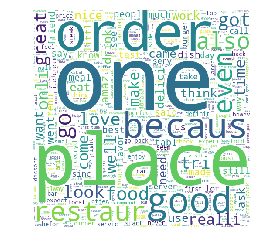

In [48]:
#WordCloud of words from open restaurants' reviews
wc_review = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(open_restaurant_reviewDF['normalized_text'].sum()))
plt.imshow(wc_review)
plt.axis("off")
plt.savefig("open_restaurant_review_word_cloud.pdf", format = 'pdf')

In [49]:
open_restaurant_reviewDF['tokenized_sents'] = open_restaurant_reviewDF['text'].apply(lambda x: 
    

                                                           [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])

In [50]:
open_restaurant_reviewDF['normalized_sents'] = open_restaurant_reviewDF['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

In [51]:
close_restaurant_reviewDF['tokenized_sents'] = close_restaurant_reviewDF['text'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])

In [52]:
close_restaurant_reviewDF['normalized_sents'] = close_restaurant_reviewDF['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

In [53]:
import networkx as nx
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [54]:
def tokenize(text):
    tokenlist = nltk.word_tokenize(text)
    normalized = lucem_illud.normalizeTokens(tokenlist, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic)
    return normalized

In [55]:
g_review_open = wordCooccurrence(open_restaurant_reviewDF['normalized_sents'][:100].sum())
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence_review_open = senVectorizer.fit_transform(open_restaurant_reviewDF['text'][:100])
g_2mode_review = nx.Graph()

#define all the nodes
g_2mode_review.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence_review_open.shape[1])), bipartite = 'word')
g_2mode_review.add_nodes_from(range(senVects_incidence_review_open.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode_review.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence_review_open[d, w]}) for d, w in zip(*senVects_incidence_review_open.nonzero())))


In [56]:
g_review_close = wordCooccurrence(close_restaurant_reviewDF['normalized_sents'][:100].sum())
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence_review_close = senVectorizer.fit_transform(close_restaurant_reviewDF['text'][:100])
g_2mode_review_close = nx.Graph()

#define all the nodes
g_2mode_review_close.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence_review_close.shape[1])), bipartite = 'word')
g_2mode_review_close.add_nodes_from(range(senVects_incidence_review_close.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode_review_close.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence_review_close[d, w]}) for d, w in zip(*senVects_incidence_review_close.nonzero())))


In [57]:
g_review_open.remove_edges_from([(n1, n2) for n1, n2, d in g_review_open.edges(data = True) if d['weight'] <= 6])
g_review_open.remove_nodes_from(list(nx.isolates(g_review_open))) 
giant_review_open = max(nx.connected_component_subgraphs(g_review_open), key=len) 
print(nx.info(giant_review_open))

Name: 
Type: Graph
Number of nodes: 40
Number of edges: 88
Average degree:   4.4000


In [58]:
g_review_close.remove_edges_from([(n1, n2) for n1, n2, d in g_review_close.edges(data = True) if d['weight'] <= 5])
g_review_close.remove_nodes_from(list(nx.isolates(g_review_close))) 
giant_review_close = max(nx.connected_component_subgraphs(g_review_close), key=len) 
print(nx.info(giant_review_close))

Name: 
Type: Graph
Number of nodes: 42
Number of edges: 66
Average degree:   3.1429


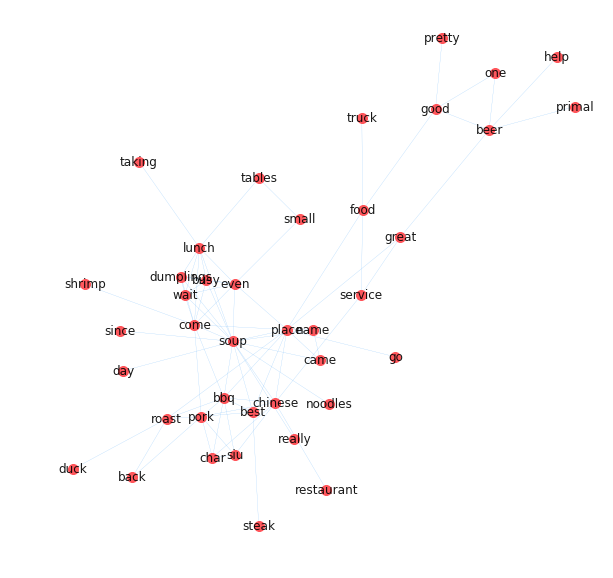

In [59]:
#Co-occurrence Plot of reviews in open restaurants
layout_review_open = nx.spring_layout(giant_review_open, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant_review_open, ax = ax, pos = layout_review_open, labels = {n:n for n in giant_review_open.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

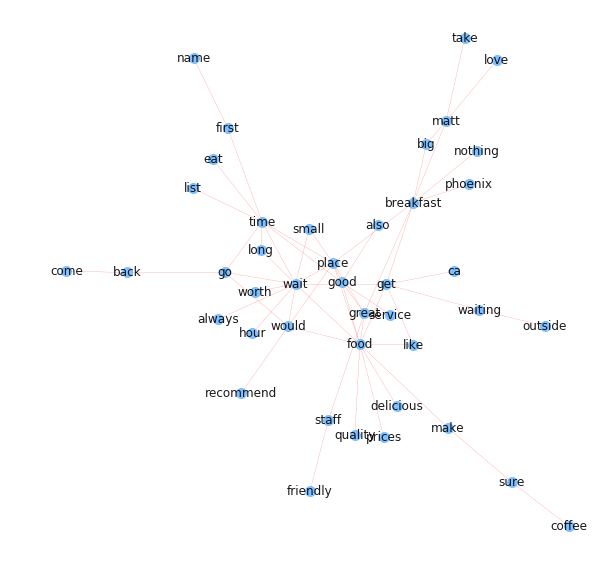

In [60]:
#Co-occurrence Plot of reviews in close restaurants
layout_review_close = nx.spring_layout(giant_review_close, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant_review_close, ax = ax, pos = layout_review_close, labels = {n:n for n in giant_review_close.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:sky blue",
        edge_color='xkcd:light red') #Getting labels is a bit annoying

In [61]:
placeNeighbors_open = giant_review_open.neighbors('place')
g_place_open = giant_review_open.subgraph(placeNeighbors_open)
print(nx.info(g_place_open))

Name: 
Type: SubGraph
Number of nodes: 13
Number of edges: 28
Average degree:   4.3077


In [116]:

foodNeighbors_close = giant_review_close.neighbors('food')
g_food_close = giant_review_food.subgraph(placeNeighbors_food)
print(nx.info(g_place_food))

Name: 
Type: SubGraph
Number of nodes: 12
Number of edges: 24
Average degree:   4.0000


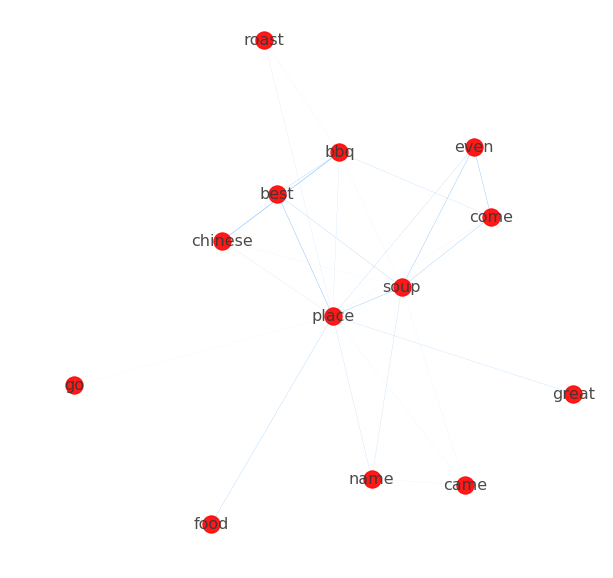

In [63]:
#Co-occurrence plot of "place" neighbors in reviews of open restaurants
layout_place_open = nx.spring_layout(g_place_open, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_place_open.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_place_open.edges(data = True)))
nx.draw(g_place_open, ax = ax, pos = layout_place_open, labels = {n:n for n in g_place_open.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_place_open.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

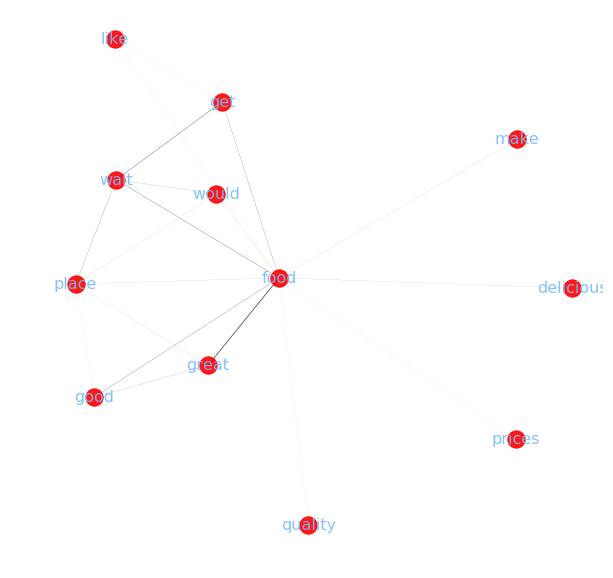

In [117]:
#Co-occurrence plot of "food" neighbors in reviews of close restaurants
layout_food_close = nx.spring_layout(g_food_close, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_food_close.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_food_close.edges(data = True)))
nx.draw(g_food_close, ax = ax, pos = layout_food_close, labels = {n:n for n in g_place_close.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_food_close.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:sky blue',
        edge_color = 'xkcd:dark gray',
        cmap = plt.get_cmap('plasma')) 

In [65]:
import gensim
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

open_reviewW2V = gensim.models.word2vec.Word2Vec(open_restaurant_reviewDF['normalized_sents'].sum())


In [66]:
#Finding Words most similar to word "food" using W2V, which can help me with find food-related words later on
open_reviewW2V.most_similar('food')

[('buffet', 0.6192734241485596),
 ('fairly', 0.606682538986206),
 ('fast', 0.5905660390853882),
 ('consistently', 0.5896435379981995),
 ('value', 0.576420783996582),
 ('although', 0.5742132663726807),
 ('however', 0.5634701251983643),
 ('drinks', 0.5524577498435974),
 ('reasonably', 0.5493632555007935),
 ('cheap', 0.5488681793212891)]

In [67]:
#Finding Words most similar to word "ambience" using W2V, which can help me with find ambience-related words later on
open_reviewW2V.most_similar('ambience')

[('ambiance', 0.9666565656661987),
 ('atmosphere', 0.9130874276161194),
 ('decor', 0.897447943687439),
 ('environment', 0.8845885992050171),
 ('vibe', 0.8634653091430664),
 ('concept', 0.8443894982337952),
 ('interior', 0.8291147351264954),
 ('elegant', 0.8223006725311279),
 ('relaxed', 0.8216272592544556),
 ('trendy', 0.8193435668945312)]

In [68]:
#Finding Words most similar to word "service" using W2V, which can help me with find service-related words later on
open_reviewW2V.most_similar('service')

[('consistently', 0.671584963798523),
 ('relations', 0.6649532318115234),
 ('attitude', 0.6107300519943237),
 ('job', 0.6003912687301636),
 ('pricing', 0.5981130599975586),
 ('bartenders', 0.589091420173645),
 ('detail', 0.5845679640769958),
 ('waitstaff', 0.5827926397323608),
 ('staff', 0.5797882676124573),
 ('skills', 0.5711216926574707)]

In [69]:
open_reviewW2V.most_similar(positive=['good', 'food'], negative = ['service'])

[('decent', 0.6690928339958191),
 ('usual', 0.6194896697998047),
 ('tasty', 0.6145999431610107),
 ('tacos', 0.6005414724349976),
 ('standard', 0.5998985767364502),
 ('huge', 0.58590167760849),
 ('interesting', 0.5702970027923584),
 ('big', 0.5603471398353577),
 ('great', 0.5584329962730408),
 ('typical', 0.5561503171920776)]

In [70]:
numWords = 150
targetWords_review_open = open_reviewW2V.wv.index2word[:numWords]
targetWords_review_open

['food',
 'good',
 'place',
 'great',
 'service',
 'like',
 'would',
 'time',
 'one',
 'get',
 'back',
 'really',
 'go',
 'us',
 'also',
 'got',
 'chicken',
 'nice',
 'even',
 'could',
 'ordered',
 'restaurant',
 'well',
 'best',
 'came',
 'menu',
 'went',
 'first',
 'always',
 'little',
 'love',
 'try',
 'order',
 'experience',
 'people',
 'delicious',
 'much',
 'come',
 'staff',
 'definitely',
 'never',
 'amazing',
 'made',
 'friendly',
 'make',
 'pretty',
 'way',
 'better',
 'two',
 'going',
 'know',
 'said',
 'new',
 'ever',
 'table',
 'right',
 'wait',
 'night',
 'day',
 'recommend',
 'say',
 'think',
 'take',
 'want',
 'bar',
 'still',
 'salad',
 'meal',
 'sure',
 'around',
 'everything',
 'next',
 'bit',
 'sauce',
 'dinner',
 'took',
 'see',
 'cheese',
 'another',
 'since',
 'steak',
 'told',
 'times',
 'price',
 'drinks',
 'cream',
 'minutes',
 'eat',
 'many',
 'give',
 'every',
 'small',
 'asked',
 'car',
 'though',
 'burger',
 'vegas',
 'area',
 'side',
 'ca',
 'something',
 

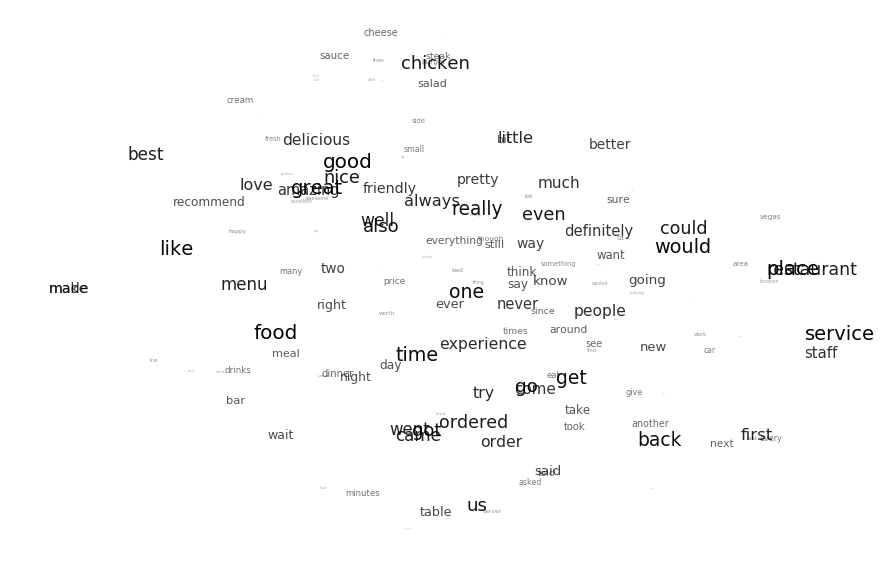

In [71]:
#Plot co-occurence graph with Top 150 words in open restaurants' reviews
wordsSubMatrix_review_open = []
for word in targetWords_review_open:
    wordsSubMatrix_review_open.append(open_reviewW2V[word])
wordsSubMatrix_review_open = np.array(wordsSubMatrix_review_open)
wordsSubMatrix_review_open
pcaWords_review_open = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix_review_open)
reducedPCA_data_review_open = pcaWords_review_open.transform(wordsSubMatrix_review_open)
#T-SNE is theoretically better, but you should experiment
tsneWords_review_open = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data_review_open)

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords_review_open[:, 0], tsneWords_review_open[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords_review_open):
    ax.annotate(word, 
                (tsneWords_review_open[:, 0][i],tsneWords_review_open[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

In [72]:
close_reviewW2V = gensim.models.word2vec.Word2Vec(close_restaurant_reviewDF['normalized_sents'].sum())
targetWords_review_close = close_reviewW2V.wv.index2word[:numWords]
targetWords_review_close

['place',
 'good',
 'food',
 'like',
 'great',
 'one',
 'get',
 'would',
 'time',
 'service',
 'really',
 'back',
 'go',
 'also',
 'us',
 'got',
 'nice',
 'even',
 'ordered',
 'could',
 'little',
 'restaurant',
 'try',
 'came',
 'went',
 'much',
 'well',
 'people',
 'order',
 'best',
 'menu',
 'love',
 'pretty',
 'first',
 'friendly',
 'wait',
 'breakfast',
 'night',
 'chicken',
 'staff',
 'bar',
 'always',
 'never',
 'come',
 'know',
 'two',
 'make',
 'better',
 'think',
 'delicious',
 'made',
 'going',
 'definitely',
 'fresh',
 'small',
 'way',
 'eat',
 'lunch',
 'right',
 'say',
 'said',
 'want',
 'cheese',
 'around',
 'experience',
 'new',
 'still',
 'table',
 'sushi',
 'sure',
 'bit',
 'amazing',
 'bad',
 'pizza',
 'give',
 'day',
 'ever',
 'see',
 'minutes',
 'something',
 'salad',
 'sauce',
 'drinks',
 'since',
 'though',
 'meal',
 'find',
 'big',
 'next',
 'take',
 'everything',
 'times',
 'another',
 'side',
 'area',
 'tried',
 'dinner',
 'took',
 'long',
 'price',
 'worth',
 

In [73]:
close_reviewW2V.most_similar(positive=['bad', 'food'], negative = ['service'])

[('ok', 0.7116247415542603),
 ('okay', 0.6993417739868164),
 ('however', 0.6963622570037842),
 ('disappointed', 0.6870497465133667),
 ('better', 0.6813012957572937),
 ('usually', 0.6720791459083557),
 ('worse', 0.6720180511474609),
 ('actually', 0.6715469360351562),
 ('horrible', 0.6559911966323853),
 ('disappointing', 0.653349757194519)]

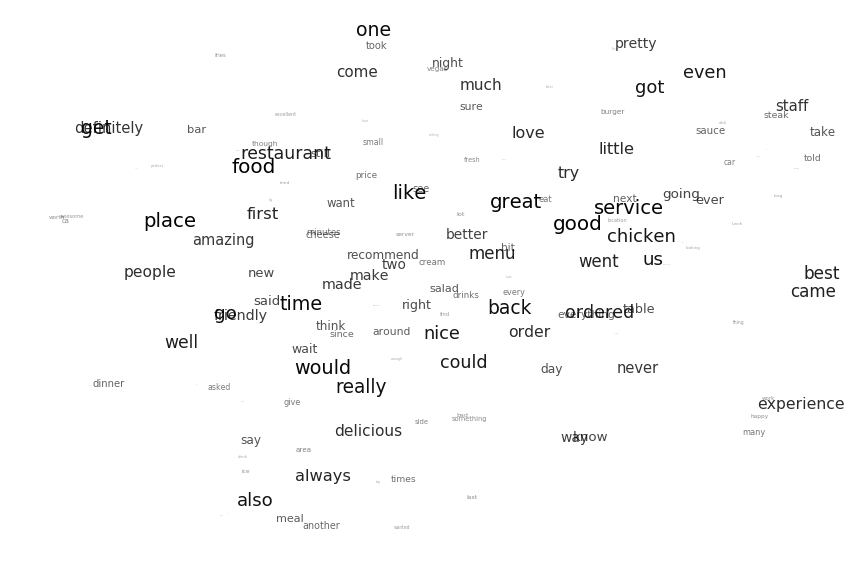

In [74]:
#Plot co-occurence graph with Top 150 words in open restaurants' reviews
wordsSubMatrix_review_close = []
for word in targetWords_review_close:
    wordsSubMatrix_review_close.append(close_reviewW2V[word])
wordsSubMatrix_review_close = np.array(wordsSubMatrix_review_close)

pcaWords_review_close = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix_review_close)
reducedPCA_data_review_close = pcaWords_review_close.transform(wordsSubMatrix_review_close)
#T-SNE is theoretically better, but you should experiment
tsneWords_review_close = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data_review_close)

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords_review_close[:, 0], tsneWords_review_close[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords_review_open):
    ax.annotate(word, 
                (tsneWords_review_close[:, 0][i],tsneWords_review_close[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

In [75]:
#Finding FOOD, AMBIENCE, SERVICE, related words using word bank from Corpora project (Corpora Project, 2016) 
#from the GitHub, as well as the Thesaurus website 

import pycorpora

sandwich_names = []
beer_categories = []
beer_styles = []
breads = []
pastries = []
condiments = []
fruits = []
herbs = []
spices = []
mixtures = []
menuItems = []
pizzaToppings = []
vegetables = []

for sandwich in pycorpora.foods.get_file("sandwiches")['sandwiches']:
    sandwich_names.append(sandwich['name'].lower())

for beer in pycorpora.foods.get_file("beer_categories")['beer_categories']:
    beer_categories.append(beer.lower())

for beer in pycorpora.foods.get_file("beer_styles")['beer_styles']:
    beer_styles.append(beer.lower())

for bread in pycorpora.foods.get_file("breads_and_pastries")['breads']:
    breads.append(bread.lower())	

for pastry in pycorpora.foods.get_file("breads_and_pastries")['pastries']:
    pastries.append(pastry.lower())

for condiment in pycorpora.foods.get_file("condiments")['condiments']:
    condiments.append(condiment.lower())

for fruit in pycorpora.foods.get_file("fruits")['fruits']:
    fruits.append(fruit.lower())

for herb in pycorpora.foods.get_file("herbs_n_spices")['herbs']:
    herbs.append(herb.lower())

for spice in pycorpora.foods.get_file("herbs_n_spices")['spices']:
    spices.append(spice.lower())

for mixture in pycorpora.foods.get_file("herbs_n_spices")['mixtures']:
    mixtures.append(mixture.lower())

for item in pycorpora.foods.get_file("menuItems")['menuItems']:
    menuItems.append(item.lower())

for topping in pycorpora.foods.get_file("pizzaToppings")['pizzaToppings']:
    pizzaToppings.append(topping.lower())

for vegetable in pycorpora.foods.get_file("vegetables")['vegetables']:
    vegetables.append(vegetable.lower())

my_food_related_words = ['food','bread','cooking','cuisine','drink','foodstuff','meal',
'meat','snack','bite','chow','cookery','diet','eatable','eats','goodies','grit',
'groceries','menu','nourishment','nutrition','refreshment','subsistence','sustenance',
'entree','fast food','home cooking','feast','take out','beverage','recipe','beef',
'fat','fatness','corn','juice','butter','fiber','portion','honey','Apple','bagel',
'beer','carrots','cheddar','cheese','chicken','breast','chili','cookie','coffee',
'coke','egg','granola','beans','patty','hot dog','ice cream','jelly','doughnut', 
'ketchup','milk', 'nuts','mustard','oatmeal','peanut','pizza','pork','chop','potato',
'chips','pretzels','raisins','ranch','salad','dressing','rice','salsa','Shrimp',
'spaghetti','tuna','wine','cake','chocolate','meatloaf','pie','roast','gravy',
'macaroni','burger','oil','olive','fries','mousse','custard','appetizer','dessert',
'lettuce','tomatoes','quiche','brew','sushi','roll','curry','sandwich','ramen',
'sashimi','poke','wasabi','udon','tonkotsu','katsudon','tempura','unagi','edamame',
'soysauce','peppers','sausage'] 

foods_list = list(set(my_food_related_words + sandwich_names + beer_categories + beer_styles 
    + breads + pastries + condiments + fruits + herbs + spices + mixtures + menuItems 
    + pizzaToppings + vegetables))

ambience_words_list = list(set(['ambience','decor','scene','site','situation',
'place','atmosphere','decoration','environment']))

service_words_list = list(set(['service','account','assistance','duty','serviceability',
    'servicing','supply','help','aid','assist','server','waiter','waitress','serve',
    'front desk','bartender','chef','staff','manager','executive','baker']))


In [76]:
#Feature Sentence Extraction: extracte all the nouns ('NN' or 'NNJ') 
#out of the review sentences from close restaurants. If any of the nouns in the sentence 
#contains words from any of the feature word banks, the sentence will be included in that category

food_related_sentences = []
ambience_related_sentences=[]
service_related_sentences=[]
for one_person_review in close_restaurant_review_sentences:
    for sentence in one_person_review:
        text = nltk.word_tokenize(sentence)
        tagged_words = nltk.pos_tag(text)
        nouns_in_sentence = [word for word,pos in tagged_words if pos == 'NN' or pos == 'NNJ']
        #time6 = int(round(time.time() * 1000))
        #print("word tokenize time: ", time6 - time5, "ms")
        if any(word in foods_list for word in nouns_in_sentence):    
            #print('hhhhh')
            food_related_sentences.append(sentence)
        if any(word in ambience_words_list for word in nouns_in_sentence):    
            #print('hhhhh')
            ambience_related_sentences.append(sentence)
        if any(word in service_words_list for word in nouns_in_sentence):    
            #print('hhhhh')
            service_related_sentences.append(sentence)

In [77]:
#A dataframe of review sentences, with its category
close_food_review_df = pandas.DataFrame(food_related_sentences,columns = ['text'])
close_food_review_df['category'] = 'Food'
close_ambience_review_df = pandas.DataFrame(ambience_related_sentences,columns = ['text'])
close_ambience_review_df['category'] = 'Ambience'
close_service_review_df = pandas.DataFrame(service_related_sentences,columns = ['text'])
close_service_review_df['category'] = 'Service'
frames = [close_food_review_df, close_ambience_review_df, close_service_review_df]
close_review_by_category_df = pandas.concat(frames,ignore_index=True)
close_review_by_category_df

,text,category
0,The food sure deserves it.,Food
1,I had the kafta plate which was more than enou...,Food
2,They do a special trick with the rice which ma...,Food
3,Ordered takeout from the place and the food wa...,Food
4,"We got the gyro salad, a side of falafel and a...",Food
5,Decent prices for a good amounts of food!,Food
6,try the yogurt drink...perfect!,Food
7,chicken Sharwma was superb.,Food
8,All the food is very fresh and incredibly deli...,Food
9,"I had the falafel plate, which included not on...",Food


In [78]:
#Feature Sentence Extraction: extracte all the nouns ('NN' or 'NNJ') 
#out of the review sentences from open restaurants. If any of the nouns in the sentence 
#contains words from any of the feature word banks, the sentence will be included in that category

open_food_related_sentences = []
open_ambience_related_sentences=[]
open_service_related_sentences=[]
for one_person_review in open_restaurant_review_sentences:
    for sentence in one_person_review:
        text = nltk.word_tokenize(sentence)
        tagged_words = nltk.pos_tag(text)
        nouns_in_sentence = [word for word,pos in tagged_words if pos == 'NN' or pos == 'NNJ']
        #time6 = int(round(time.time() * 1000))
        #print("word tokenize time: ", time6 - time5, "ms")
        if any(word in foods_list for word in nouns_in_sentence):    
            #print('hhhhh')
            open_food_related_sentences.append(sentence)
        if any(word in ambience_words_list for word in nouns_in_sentence):    
            #print('hhhhh')
            open_ambience_related_sentences.append(sentence)
        if any(word in service_words_list for word in nouns_in_sentence):    
            #print('hhhhh')
            open_service_related_sentences.append(sentence)

In [79]:
food_related_sentences

['The food sure deserves it.',
 'I had the kafta plate which was more than enough food.',
 'They do a special trick with the rice which makes it taste like no other.',
 'Ordered takeout from the place and the food was great.',
 'We got the gyro salad, a side of falafel and also the gyro plate!',
 'Decent prices for a good amounts of food!',
 'try the yogurt drink...perfect!',
 'chicken Sharwma was superb.',
 'All the food is very fresh and incredibly delicious.',
 'I had the falafel plate, which included not only 6 falafel patties, but a salad and a generous helping of hummus and pita.',
 'I love the food.',
 'The chicken, the bread, rice, salad.',
 "The food is great, the prices are very good and it's very fast ... you can't beat that!",
 'My new favorite Mediterranean food restaurant!',
 'Great food at a great price.',
 'The grape leaves and gyro are amazing',
 'Service was really good.\\nWe had the humus with meat (great idea), hubby had a gyro sandwich (pita wrap) and he loved it.'

In [82]:
from itertools import chain

In [81]:
#Tokenize, normalize and POS Tagging the food related sentences
close_food_related_sentences_tokenized_text = [nltk.word_tokenize(x) for x in food_related_sentences]
close_food_related_sentences_normalized_text= [lucem_illud.normalizeTokens(x,stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic) for x in close_food_related_sentences_tokenized_text]
close_food_related_sentences_normalized_tokens_POS = [nltk.pos_tag(t) for t in close_food_related_sentences_normalized_text]
close_food_related_sentences_normalized_tokens_POS = list(chain.from_iterable(close_food_related_sentences_normalized_tokens_POS))

open_food_related_sentences_tokenized_text = [nltk.word_tokenize(x) for x in open_food_related_sentences]
open_food_related_sentences_normalized_text= [lucem_illud.normalizeTokens(x,stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic) for x in open_food_related_sentences_tokenized_text]
open_food_related_sentences_normalized_tokens_POS = [nltk.pos_tag(t) for t in open_food_related_sentences_normalized_text]
open_food_related_sentences_normalized_tokens_POS = list(chain.from_iterable(open_food_related_sentences_normalized_tokens_POS))

In [84]:
close_food_related_sentences_normalized_tokens_POS

[('food', 'NN'),
 ('sure', 'JJ'),
 ('deserv', 'NN'),
 ('kafta', 'NN'),
 ('plate', 'NN'),
 ('enough', 'JJ'),
 ('food', 'NN'),
 ('special', 'JJ'),
 ('trick', 'JJ'),
 ('rice', 'NN'),
 ('make', 'VBP'),
 ('tast', 'NN'),
 ('like', 'IN'),
 ('order', 'NN'),
 ('takeout', 'NN'),
 ('place', 'NN'),
 ('food', 'NN'),
 ('great', 'JJ'),
 ('got', 'VBD'),
 ('gyro', 'JJ'),
 ('salad', 'JJ'),
 ('side', 'NN'),
 ('falafel', 'NN'),
 ('also', 'RB'),
 ('gyro', 'JJ'),
 ('plate', 'NN'),
 ('decent', 'JJ'),
 ('price', 'NN'),
 ('good', 'JJ'),
 ('amount', 'NN'),
 ('food', 'NN'),
 ('tri', 'NN'),
 ('yogurt', 'NN'),
 ('drink', 'VBP'),
 ('perfect', 'NN'),
 ('chicken', 'NN'),
 ('sharwma', 'NN'),
 ('superb', 'NN'),
 ('food', 'NN'),
 ('veri', 'NN'),
 ('fresh', 'JJ'),
 ('incred', 'VBD'),
 ('delici', 'NN'),
 ('falafel', 'JJ'),
 ('plate', 'NN'),
 ('includ', 'NN'),
 ('onli', 'NN'),
 ('falafel', 'NN'),
 ('patti', 'NN'),
 ('salad', 'NN'),
 ('generous', 'JJ'),
 ('help', 'NN'),
 ('hummus', 'VB'),
 ('pita', 'NN'),
 ('love', 'VB'),
 

In [86]:
#Finding frequency distributions for the food related sentences

#For close
foodreviewcfdist_WordtoPOS_close = nltk.ConditionalFreqDist(close_food_related_sentences_normalized_tokens_POS)
foodreviewcfdist_POStoWord_close= nltk.ConditionalFreqDist((p, w) for w, p in close_food_related_sentences_normalized_tokens_POS)
#For open
foodreviewcfdist_WordtoPOS_open = nltk.ConditionalFreqDist(open_food_related_sentences_normalized_tokens_POS)
foodreviewcfdist_POStoWord_open= nltk.ConditionalFreqDist((p, w) for w, p in open_food_related_sentences_normalized_tokens_POS)

In [87]:
#Most common 5 adjectives in food related sentences from close restaurants' reviews
foodreviewcfdist_POStoWord_close['JJ'].most_common(5)

[('good', 3187), ('great', 2025), ('fresh', 907), ('nice', 706), ('much', 578)]

In [88]:
#Count the frequency of the most common adjective in food related sentences from close restaurants' reviews
foodreviewcpdist_POStoWord_close = nltk.ConditionalProbDist(foodreviewcfdist_POStoWord_close, nltk.ELEProbDist)

#print the most common adjectives
print(foodreviewcpdist_POStoWord_close['JJS'].max())

#And its probability
print(foodreviewcpdist_POStoWord_close['JJS'].prob(foodreviewcpdist_POStoWord_close['JJS'].max()))

best
0.5111498257839722


In [89]:
#Most common 5 adjectives in food related sentences from open restaurants' reviews
foodreviewcfdist_POStoWord_open['JJ'].most_common(5)

[('good', 4940),
 ('great', 3633),
 ('nice', 1167),
 ('servic', 1060),
 ('fresh', 998)]

In [90]:
#Count the frequency of the most common adjective in food related sentences from close restaurants' reviews
foodreviewcpdist_POStoWord_open = nltk.ConditionalProbDist(foodreviewcfdist_POStoWord_open, nltk.ELEProbDist)

#print the most common adjectives
print(foodreviewcpdist_POStoWord_open['JJS'].max())

#And its probability
print(foodreviewcpdist_POStoWord_open['JJS'].prob(foodreviewcpdist_POStoWord_open['JJS'].max()))

best
0.583351684650958


In [91]:
foodreviewcfdist_POStoWord_close['VB'].most_common(5)

[('get', 1041), ('go', 691), ('love', 380), ('come', 316), ('drink', 292)]

In [92]:
ambience_related_sentences

['Ordered takeout from the place and the food was great.',
 'Have been wanting to find a good mom and pops Mediterranean place nearby and this is it!',
 'I saw a sign for this place on our way to the movies this weekend.',
 'Love this place!',
 'This place is FANTASTIC!',
 'This place, while not fancy, definitely is comparable to The Persian Room at a fraction of the cost.',
 'This place is AMAZING and DELICIOUS!!!!',
 'My husband picked it up and said the family that ran the place is so nice.',
 'When I tried this falafel, I knew I had found a place for me!',
 "It's not a nice, sit down dining environment.",
 'Typical sports bar but a good place to watch a game and enjoy a great meal.',
 'I am picky about my Pizza, and this place is one of the very few that I come back to, because I crave it.',
 'Great place to watch football games in Vegas.',
 'This place is awesome!!!',
 "I am a die-hard fan of Robert's in Tucson but this is the first place that gives them a run for their money.",
 

In [94]:
#Tokenize, normalize and POS Tagging the ambience related sentences

close_ambience_related_sentences_tokenized_text = [nltk.word_tokenize(x) for x in ambience_related_sentences]
close_ambience_related_sentences_normalized_text= [lucem_illud.normalizeTokens(x,stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic) for x in close_ambience_related_sentences_tokenized_text]
close_ambience_related_sentences_normalized_tokens_POS = [nltk.pos_tag(t) for t in close_ambience_related_sentences_normalized_text]
close_ambience_related_sentences_normalized_tokens_POS = list(chain.from_iterable(close_ambience_related_sentences_normalized_tokens_POS))

open_ambience_related_sentences_tokenized_text = [nltk.word_tokenize(x) for x in open_ambience_related_sentences]
open_ambience_related_sentences_normalized_text= [lucem_illud.normalizeTokens(x,stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic) for x in open_ambience_related_sentences_tokenized_text]
open_ambience_related_sentences_normalized_tokens_POS = [nltk.pos_tag(t) for t in open_ambience_related_sentences_normalized_text]
open_ambience_related_sentences_normalized_tokens_POS = list(chain.from_iterable(open_ambience_related_sentences_normalized_tokens_POS))

In [96]:
#Finding frequency distributions for the ambience related sentences

#For close
ambiencereviewcfdist_WordtoPOS_close = nltk.ConditionalFreqDist(close_ambience_related_sentences_normalized_tokens_POS)
ambiencereviewcfdist_POStoWord_close= nltk.ConditionalFreqDist((p, w) for w, p in close_ambience_related_sentences_normalized_tokens_POS)
#For open
ambiencereviewcfdist_WordtoPOS_open = nltk.ConditionalFreqDist(open_ambience_related_sentences_normalized_tokens_POS)
ambiencereviewcfdist_POStoWord_open= nltk.ConditionalFreqDist((p, w) for w, p in open_ambience_related_sentences_normalized_tokens_POS)


In [112]:
#Most common 5 adjectives in ambience related sentences from close restaurants' reviews
ambiencereviewcfdist_POStoWord_close['JJ'].most_common(5)

[('great', 919), ('good', 824), ('nice', 367), ('small', 300), ('new', 237)]

In [98]:
#Count the frequency of the most common adjective in ambience related sentences from close restaurants' reviews
ambiencereviewcpdist_POStoWord_close = nltk.ConditionalProbDist(ambiencereviewcfdist_POStoWord_close, nltk.ELEProbDist)

#print the most common adjectives
print(ambiencereviewcpdist_POStoWord_close['JJS'].max())

#And its probability
print(ambiencereviewcpdist_POStoWord_close['JJS'].prob(ambiencereviewcpdist_POStoWord_close['JJS'].max()))

best
0.3984547461368653


In [113]:
#Most common 5 adjectives in ambience related sentences from open restaurants' reviews

ambiencereviewcfdist_POStoWord_open['JJ'].most_common(5)

[('great', 1506), ('good', 1115), ('nice', 571), ('servic', 351), ('new', 261)]

In [100]:
#Count the frequence of the most common adjective in ambience related sentences from open restaurants' reviews

ambiencereviewcpdist_POStoWord_open = nltk.ConditionalProbDist(ambiencereviewcfdist_POStoWord_open, nltk.ELEProbDist)

#print the most common adjectives
print(ambiencereviewcpdist_POStoWord_open['JJS'].max())

#And its probability
print(ambiencereviewcpdist_POStoWord_open['JJS'].prob(ambiencereviewcpdist_POStoWord_open['JJS'].max()))

best
0.4725557461406518


In [101]:
ambiencereviewcfdist_POStoWord_close['VB'].most_common(5)

[('go', 326), ('love', 307), ('get', 306), ('recommend', 122), ('give', 111)]

In [102]:
service_related_sentences

['\\n\\nExtremely friendly and nice service.',
 'The staff were very friendly, to boot.',
 'Very fresh, quick service and wonderful.',
 'Wonderful customer service.',
 'The staff are friendly.',
 'The service was great and the variety on menu good.',
 "Unfortunately, I'm left pretty disappointed.\\n\\nTo the staff's credit they were incredibly polite and the service was great.",
 'Soooo glad we did..............the service was outstanding and the food Delish..........She and I had the Kafta Combo and loved it!',
 'The family and staff are informative and kind.',
 'It was really important for me to find an affordable treatment plan without compromising on quality of service.',
 'We live in the neighborhood and have been here many times and have always had great service in the past.',
 'This was our first Friday evening at Double Play and the service was horrible!',
 "In short...the only thing lacking here is the staff's attention to the patrons.",
 '\\nOverall this is a good spot to pla

In [104]:
#Tokenizing, Normalizing and POS Tagging
close_service_related_sentences_tokenized_text = [nltk.word_tokenize(x) for x in service_related_sentences]
close_service_related_sentences_normalized_text= [lucem_illud.normalizeTokens(x,stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic) for x in close_service_related_sentences_tokenized_text]
close_service_related_sentences_normalized_tokens_POS = [nltk.pos_tag(t) for t in close_service_related_sentences_normalized_text]
close_service_related_sentences_normalized_tokens_POS = list(chain.from_iterable(close_service_related_sentences_normalized_tokens_POS))

open_service_related_sentences_tokenized_text = [nltk.word_tokenize(x) for x in open_service_related_sentences]
open_service_related_sentences_normalized_text= [lucem_illud.normalizeTokens(x,stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic) for x in open_service_related_sentences_tokenized_text]
open_service_related_sentences_normalized_tokens_POS = [nltk.pos_tag(t) for t in open_service_related_sentences_normalized_text]
open_service_related_sentences_normalized_tokens_POS = list(chain.from_iterable(open_service_related_sentences_normalized_tokens_POS))

In [106]:
#Finding frequency distributions for the service related sentences

#For close
servicereviewcfdist_WordtoPOS_close = nltk.ConditionalFreqDist(close_service_related_sentences_normalized_tokens_POS)
servicereviewcfdist_POStoWord_close= nltk.ConditionalFreqDist((p, w) for w, p in close_service_related_sentences_normalized_tokens_POS)
#For open
servicereviewcfdist_WordtoPOS_open = nltk.ConditionalFreqDist(open_service_related_sentences_normalized_tokens_POS)
servicereviewcfdist_POStoWord_open= nltk.ConditionalFreqDist((p, w) for w, p in open_service_related_sentences_normalized_tokens_POS)


In [114]:
#Most common 5 adjectives in service related sentences from close restaurants' reviews
servicereviewcfdist_POStoWord_close['JJ'].most_common(5)

[('servic', 1365), ('great', 995), ('good', 847), ('nice', 338), ('slow', 181)]

In [121]:
#Count the frequency of the most common adjectives in service related sentences from close restaurants' reviews
servicereviewcpdist_POStoWord_close = nltk.ConditionalProbDist(servicereviewcfdist_POStoWord_close, nltk.ELEProbDist)

#print the most common adjectives
print(servicereviewcpdist_POStoWord_close['JJS'].max())

#And its probability
print(servicereviewcpdist_POStoWord_close['JJS'].prob(servicereviewcpdist_POStoWord_close['JJS'].max()))

best
0.37376586741889983


In [115]:
#Most common 5 adjectives in service related sentences from close restaurants' reviews

servicereviewcfdist_POStoWord_open['JJ'].most_common(5)

[('servic', 3161),
 ('great', 2160),
 ('good', 1409),
 ('nice', 594),
 ('bad', 307)]

In [120]:
##Count the frequency of the most common adjectives in service related sentences from close restaurants' reviews
servicereviewcpdist_POStoWord_open = nltk.ConditionalProbDist(servicereviewcfdist_POStoWord_open, nltk.ELEProbDist)

#print the most common adjectives
print(servicereviewcpdist_POStoWord_open['JJS'].max())

#And its probability
print(servicereviewcpdist_POStoWord_open['JJS'].prob(servicereviewcpdist_POStoWord_open['JJS'].max()))

best
0.40012406947890816


In [111]:
servicereviewcfdist_POStoWord_close['VB'].most_common(5)

[('get', 305), ('go', 174), ('take', 120), ('come', 105), ('ask', 84)]